Analyse du fichier d'inventaire de GES par commune en 2016 (35797 communes)

Le fichier contient la quantité de GES en Teq CO2 (Tonne équivalent CO2) que sont les six gaz (CO2, CH4, N2O, CFC, HFC, SF6) pris en compte dans le protocole de Kyoto par secteur (Agriculture, Autres transports, Autres transports international, CO2 biomasse hors-total, Déchets, Energie, Industrie hors-énergie, Résidentiel, Routier, Tertiaire)

!!!!!! Les secteurs autres transports et autres transports international ont beaucoup de valeurs manquantes. !!!!!

Les champs: 
INSEE commune => code commune (uri-reference)
Commune ==> libelle commune (string)

Tous les champs suivant sont des secteurs stockant la quantité de GES (number):

Agriculture, Autres transports, Autres transports international, CO2 biomasse hors-total, Déchets, Energie, Industrie hors-énergie, Résidentiel, Routier, Tertiaire,


lat => Coordonnée géographique qui permet de se situer par rapport à l'équateur
lon => Coordonnée géographique qui permet de se situer par rapport au méridien de Greenwich
     

In [1]:
import pandas as pd

#Fichiers de l'inventaire de GES territorialisé par Communes (2016)
CITEPA_SRC = "./IGT - Pouvoir de réchauffement global-full.csv"

DF_CITEPA_SRC = pd.read_csv(CITEPA_SRC)


In [2]:
#DF_CITEPA_SRC.head()

#DF_CITEPA_SRC.shape

#DF_CITEPA_SRC.columns

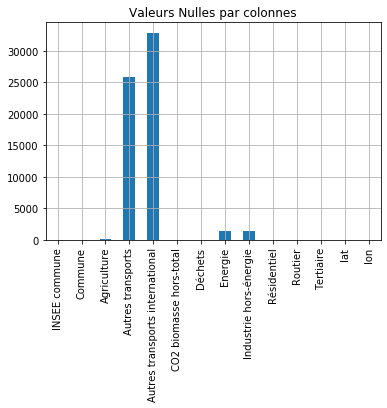

In [3]:
#Valeurs nulles par secteur
DF_CITEPA_SRC.isnull().sum().plot.bar(title='Valeurs Nulles par colonnes', grid=True)

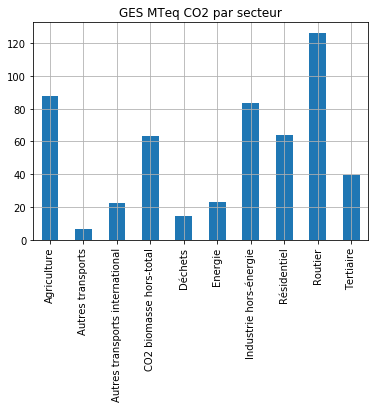

In [4]:
#sélection des secteurs d'activité avec exclusion des deux secteurs ('Autres transports', 'Autres transports international')
#car trop peu de données pour être représentatifs 
Col = ['Agriculture', 'CO2 biomasse hors-total', 'Déchets', 'Energie', 'Industrie hors-énergie', 'Résidentiel', 'Routier', 'Tertiaire']

#Total par secteur en Méga Tonnes équivalent CO2
(DF_CITEPA_SRC[Col].sum()/1000000).plot.bar(title='GES MTeq CO2 par secteur', grid=True)


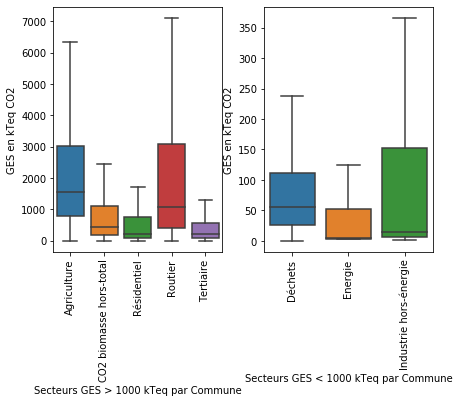

In [40]:
#centrage et répartition par secteur d'activité avec exclusion des outliers
#exclusion des deux secteurs ('Autres transports', 'Autres transports international')

import matplotlib.pyplot as plt
import seaborn as sns

High_value = ['Agriculture', 'CO2 biomasse hors-total', 'Résidentiel', 'Routier', 'Tertiaire']
Low_value= ['Déchets', 'Energie', 'Industrie hors-énergie']

fig,axes = plt.subplots(1,2)
fig.tight_layout()

s = sns.boxplot(ax=axes[0], x="variable", y="value", data=pd.melt((DF_CITEPA_SRC[High_value])), showfliers=False)
s.set_xlabel("Secteurs GES > 1000 kTeq par Commune")
s.set_ylabel("GES en kTeq CO2")
s.set_xticklabels(s.get_xticklabels(), rotation=90)

s = sns.boxplot(ax=axes[1], x="variable", y="value", data=pd.melt((DF_CITEPA_SRC[Low_value])), showfliers=False)
s.set_xlabel("Secteurs GES < 1000 kTeq par Commune")
s.set_ylabel("GES en kTeq CO2")
s.set_xticklabels(s.get_xticklabels(), rotation=90)

plt.show()





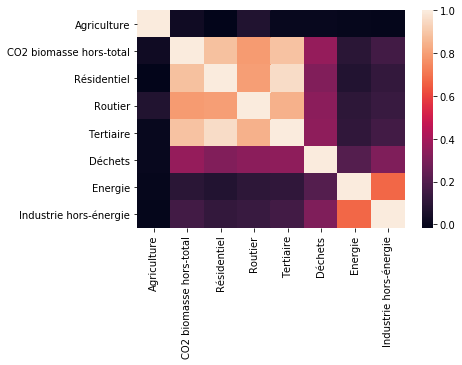

In [50]:
#Matrice de corrélation entre secteur
sa = ['Agriculture', 'CO2 biomasse hors-total', 'Résidentiel', 'Routier', 'Tertiaire', 'Déchets', 'Energie', 'Industrie hors-énergie']
corr = DF_CITEPA_SRC[sa].corr()

sh = sns.heatmap(corr)

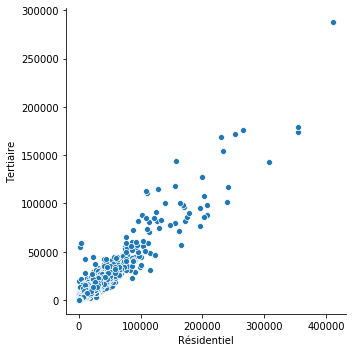

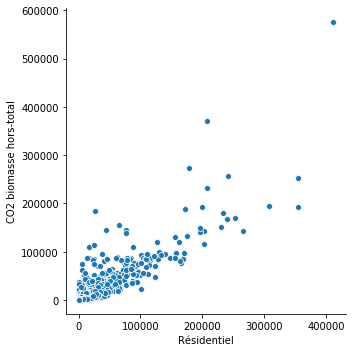

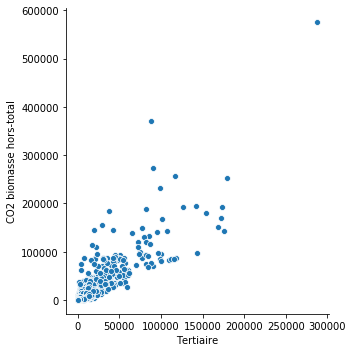

In [55]:
#scatterplot des secteurs avec corrélation forte

sns.relplot(x="Résidentiel",
            y="Tertiaire",
            data=DF_CITEPA_SRC,
            kind="scatter"
            )

sns.relplot(x="Résidentiel",
            y="CO2 biomasse hors-total",
            data=DF_CITEPA_SRC,
            kind="scatter"
            )

sns.relplot(x="Tertiaire",
            y="CO2 biomasse hors-total",
            data=DF_CITEPA_SRC,
            kind="scatter"
           )

plt.show()
